
<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 02 <h2>

The Objectives of this weeks lab is to implement and understand different methods to find out the roots of non linear equation. At the successful completion of this lab you should be able to implement different methods of solving non linear equation and understand their basic workflow along with their performance comparison. 

Implement the follwoing methods in the lab. 
- Bisection method
- Newton-Raphson method
- False Position method
- Secand method

Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot. 

### Task 01 : Bisection method ###
In this task you have to implement the body of the function `bisection__().` For more about the bisection method please visit [lecture note on bisection](http://mathforcollege.com/nm/mws/gen/03nle/mws_gen_nle_txt_bisection.pdf)

In [0]:
from sympy import *
from numpy import *
from math import *
import numpy as np
import matplotlib.pyplot as plt



In [87]:
x=Symbol('x')
eq=np.e**x+x**2+3*x+2
print(eq)
eq1=lambdify(x,eq)



2.71828182845905**x + x**2 + 3*x + 2


In [0]:
def bisection__(f,xl, xu, maxIter=20, threshold=0.2):
  array_of_values=[]
  array_of_approximations=[]

  for i in range(maxIter):
    value1=f(xl)
    value2=f(xu)
    xm=(xl+xu)/2
    array_of_values.append(xm)
    if (value1*f(xm)<0):
      xu=xm
    elif(value1*f(xm)>0):
      xl=xm
    elif(value1*f(xm)==0):
      break
  return array_of_values

# xl: lower bound of approximation
# xu: upper bound of approximation
# maxIter: maximum number of iterations
# threshold: threshold of error in percentage
# array_of_approximations: list of all approximation over 50 iterations

### Task 02 : Newton Raphson Method ###
In this task you have to implement the body of the function` newton__().` For more about the bisection method please visit [lecture note on newton raphson method](https://nm.mathforcollege.com/mws/gen/03nle/mws_gen_nle_txt_newton.pdf)

In [0]:
def newton__(fx,x0, maxIter=20, threshold=0.2):
  approx_values=[]
  Fx=lambdify(x,fx)

  fxPrime=fx.diff(x)
  FxPrime=lambdify(x,fxPrime)

  approx_values.append(x0)
  for i in range(maxIter):
    x1=x0-(Fx(x0)/FxPrime(x0))
    approx_values.append(x1)
    x0=x1
    
  return approx_values

# x0: initial approximation
# maxIter: maximum number of iterations
# threshold: threshold of error in percentage
# array_of_approximations: list of all approximation over 50 iterations

### Task 03 : False Position Method ###
In this task you have to implement the body of the function `falsePosition__().` For more about the  method please visit [lecture note on false position method](https://nm.mathforcollege.com/mws/gen/03nle/mws_gen_nle_ppt_falseposition.pdf)

In [0]:
def falsePosition__(fx, xl, xu, maxIter=20, threshold=0.2):
  array_of_values=[]
  array_of_approximations=[]
  for i in range(maxIter):
    value1=fx(xl)
    value2=fx(xu)
    xm=((xu*value1)-(xl*value2))/(value1-value2)
    array_of_values.append(xm)
    if (value1*fx(xm)<0):
      xu=xm
    elif(value1*fx(xm)>0):
      xl=xm
    elif(value1*fx(xm)==0):
       break
  return array_of_values
# x0: initial approximation
# maxIter: maximum number of iterations
# threshold: threshold of error in percentage
# array_of_approximations: list of all approximation over 50 iterations

### Task 04 : Secant Method ###
In this task you have to implement the body of the function `secant__()`. For more about the  method please visit [lecture note on secant method](https://nm.mathforcollege.com/mws/gen/03nle/mws_gen_nle_ppt_secant.pdf)

In [0]:
def secant__(fx, x0, maxIter=20, threshold=0.2):
  array_of_values=[]
  array_of_values.append(x0)
  x1=-1.0
  for i in range(maxIter):
    value1=fx(x0)
    value2=fx(x1)
    if(value1*value2==0):
      break
    x2=x0-((value1*(x0-x1))/(value1-value2))
    x0=x2
    array_of_values.append(x0)
    x1=array_of_values[i]
  return array_of_values
# x0: initial approximation
# maxIter: maximum number of iterations
# threshold: threshold of error in percentage
# array_of_approximations: list of all approximation over 50 iterations

### Task 05 : Calculate the relative approximate error ###
Implement the function `calc_error()` which takes a list of assumption as a list and returns a list of relative approximate values. 

In [0]:
def calc_error(assumptions):
  rel_approx_errors=[]
  length=len(assumptions)
  for i in range(0,length-1):
    error=abs((assumptions[i+1]-assumptions[i])/assumptions[i+1])
    rel_error=error*100
    rel_approx_errors.append(rel_error)
  return rel_approx_errors
# assumptions: list of assumptions returned by any previous method implemented successfully
# rel_approx_errors: list of calculated relative approximate error values. 
# ** make sure that you use absolute value here. 

In [97]:
print(calc_error(secant__(eq1,0)))
print(calc_error(bisection__(eq1,-9,1)))
print(calc_error(newton__(eq,0)))
print(calc_error(falsePosition__(eq1,0,1)))

[100.0, 6.655433470243817, 9.601951357904632, 3.1863994270873173, 1.2241490330249416, 0.19377386381463685, 0.010484350564790709, 8.244669967535573e-05, 3.3553941260905214e-08, 1.568815025046903e-13]
[166.66666666666669, 45.45454545454545, 29.411764705882355, 17.24137931034483, 9.433962264150944, 4.504504504504505, 2.2026431718061676, 1.0893246187363834, 0.547645125958379, 0.2730748225013654, 0.13672409078479628, 0.06831534362617844, 0.03414600833162603, 0.017075919538267138, 0.008537230863797018, 0.004268433228899001, 0.002134171066616016, 0.0010670969201448692, 0.0005335513068272158]
[100.0, 34.66508449571789, 14.023180153621459, 4.843501947718914, 0.8380564015492755, 0.027003884976445167, 2.8085995208128783e-05, 3.0309506283906166e-11, 1.5688150250469057e-13, 1.5688150250469031e-13, 1.5688150250469057e-13, 1.5688150250469031e-13, 1.5688150250469057e-13, 1.5688150250469031e-13, 1.5688150250469057e-13, 1.5688150250469031e-13, 1.5688150250469057e-13, 1.5688150250469031e-13, 1.5688150250

### Task 06: Ploting the errors###
Plot all the errors from the previous four methods in one graph to compare their comparative efficiency. Make sure that you use appropriate legend/labels in the plot to differentiate different curves.

<function matplotlib.pyplot.show>

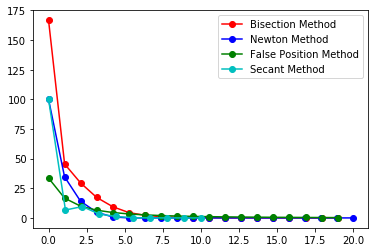

In [99]:
bisection__error=calc_error(bisection__(eq1,-9,1))
bisection=np.linspace(0,len(bisection__error),len(bisection__error))
B_M=np.array(bisection)

newton_error=calc_error(newton__(eq,0))
newton=np.linspace(0,len(newton_error),len(newton_error))
NWT=np.array(newton)

falsePosition_error=calc_error(falsePosition__(eq1,0,1))
false_pos=np.linspace(0,len(falsePosition_error),len(falsePosition_error))
fp=np.array(false_pos)

secant_error=calc_error(secant__(eq1,0))
Sec=np.linspace(0,len(secant_error),len(secant_error))
SC=np.array(Sec)

plt.plot(br,bisection__error,'-ro')
plt.plot(NWT,newton_error,'-bo')
plt.plot(fp,falsePosition_error,'-go')
plt.plot(SC,secant_error,'-co')

plt.legend(('Bisection Method','Newton Method','False Position Method','Secant Method'))
plt.show

### **Observation:**
After plotting the error approximation we can see that the error approximations of all the methods graduallu becomes zero. The initail error in Bisection, Newton and Secant method is high because of the initially guessed value. But eventually it becomes almost zero. Among the four methods Secant method takes least iterations to find the root. The rest of the methods took more iterations to find it. 